# 第5回課題
第5回課題では，以下の項目を満たすように分析してください．

明確な解答は用意していませんが，少なくとも間違っていないと言える推論をするようにしてください．

- データの取得
- データの確認
 - 特徴量の確認
 - ラベルの確認
- 仮説を立てる
- データの分析
- モデルの訓練
- 予測
- 精度の確認
- 仮説の確認

# データの取得
wine data 以外を利用してデータ分析してください．

なるべく，ラベルと属性から推論が立てやすいデータを選択するとやりやすいです．

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import random
import seaborn as sns
from sklearn.linear_model import Ridge
from sklearn.svm import SVC, SVR
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_squared_error, accuracy_score, make_scorer
phone_df = pd.read_csv("train.csv",delimiter=",")
print(phone_df.shape)
phone_df.head()

(2000, 21)


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


# データの確認
データ分析以前にわかることを確認．特徴量の属性やドメイン知識など
- 特徴量の確認
- ラベルの確認

In [7]:
phone_df.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [8]:
phone_df['price_range']

0       1
1       2
2       2
3       2
4       1
       ..
1995    0
1996    2
1997    3
1998    0
1999    3
Name: price_range, Length: 2000, dtype: int64

# 仮説を立てる
データについて，導きたい仮説と結論を整理してください．

# データの分析

In [9]:
phone_df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [10]:
feature_names = list(np.copy(phone_df.columns))
feature_names.remove("price_range")

In [11]:
X_train, X_test, y_train, y_test = \
    train_test_split(phone_df[feature_names], phone_df["price_range"], 
                     test_size=0.3, random_state=0)
X_train.shape, X_test.shape

((1400, 20), (600, 20))

<AxesSubplot:>

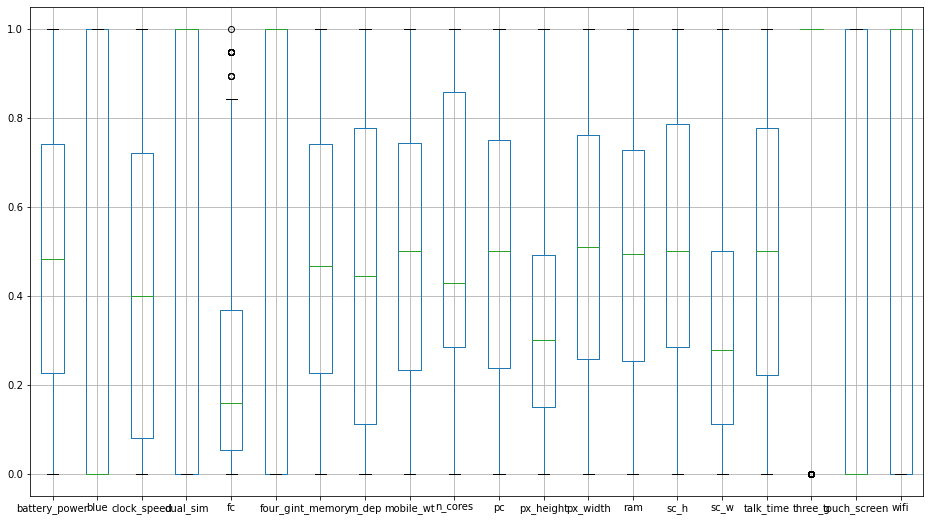

In [12]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
min_max_scaler.fit(X_train)
X=min_max_scaler.transform(X_train)
X=pd.DataFrame(X,columns=feature_names)
X.boxplot(figsize=(16,9))

In [13]:
X.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
count,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000
mean,0.490136,0.494286,0.420086,0.514286,0.221165,0.523571,0.480968,0.449365,0.495488,0.502347,0.490321,0.336586,0.510515,0.493339,0.522449,0.324365,0.498929,0.764286,0.493571,0.509286
std,0.295351,0.500146,0.326303,0.499974,0.226667,0.499623,0.296343,0.320598,0.294360,0.324796,0.302918,0.226965,0.287645,0.286867,0.297383,0.245106,0.305074,0.424596,0.500137,0.500092
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.226453,0.000000,0.080000,0.000000,0.052632,0.000000,0.225806,0.111111,0.233333,0.285714,0.237500,0.150893,0.258178,0.253274,0.285714,0.111111,0.222222,1.000000,0.000000,0.000000
50%,0.482966,0.000000,0.400000,1.000000,0.157895,1.000000,0.467742,0.444444,0.500000,0.428571,0.500000,0.300765,0.509346,0.494121,0.500000,0.277778,0.500000,1.000000,0.000000,1.000000
75%,0.740982,1.000000,0.720000,1.000000,0.368421,1.000000,0.741935,0.777778,0.743750,0.857143,0.750000,0.491837,0.761682,0.727619,0.785714,0.500000,0.777778,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

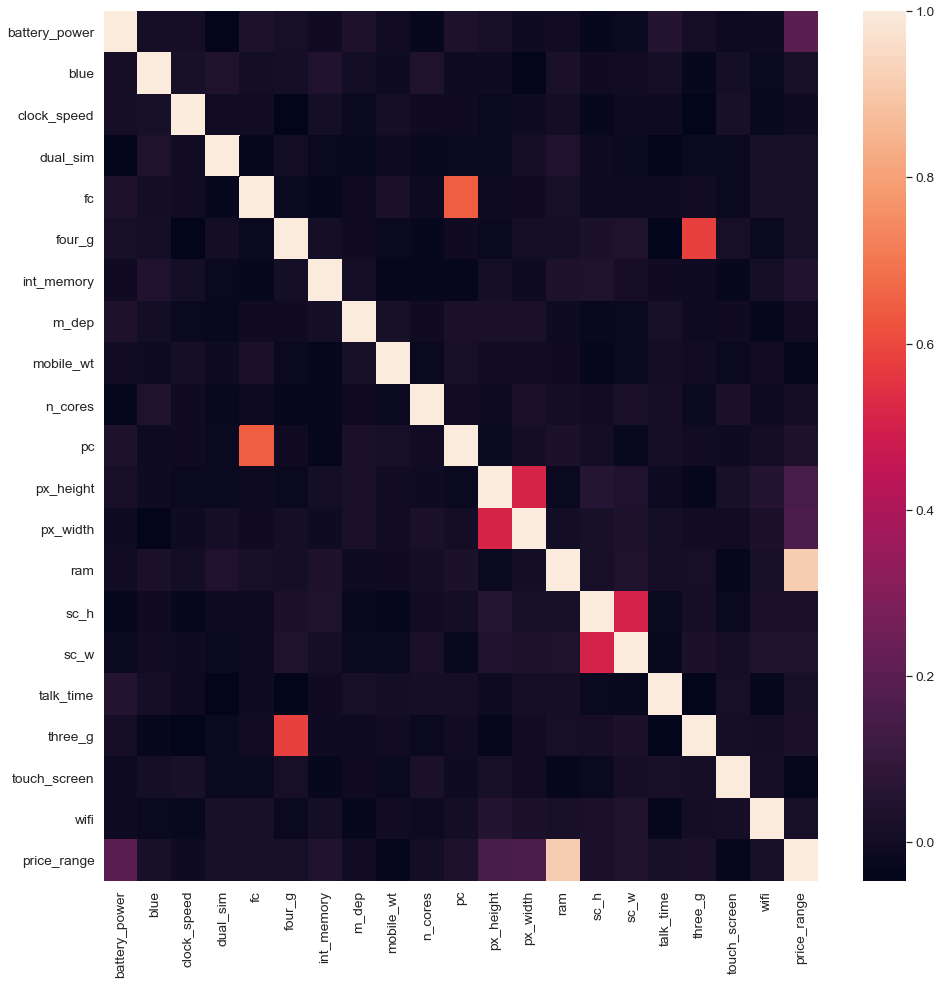

In [17]:
plt.figure(figsize=(16, 16))
sns.set(font_scale=1.25)
sns.heatmap(phone_df.corr())

In [14]:
print("price_rangeとの相関を見ると、ramに対して強い相関がある")

price_rangeとの相関を見ると、ramに対して強い相関がある


In [15]:
XX_train = (X_train-np.mean(X_train,axis=0))/np.std(X_train,axis=0)
yy_train = (y_train-np.mean(y_train,axis=0))/np.std(y_train,axis=0)

In [16]:
print("標準化")

標準化


In [17]:
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()

linear_regression.fit(XX_train,yy_train)

LinearRegression()

In [18]:
print(linear_regression.coef_)

[ 2.03997951e-01  4.16592301e-03 -5.48402002e-03 -1.28126882e-02
  7.76070936e-03 -5.73588579e-03  1.87703081e-02 -2.66887739e-03
 -2.42637004e-02  7.59992149e-03 -1.20398803e-02  1.16340766e-01
  1.11055950e-01  9.16530400e-01 -3.06455189e-03  4.23738157e-03
  3.39423366e-04  9.31653303e-03 -5.09533163e-03 -9.04065846e-03]


In [19]:
coefficient = DataFrame(linear_regression.coef_,feature_names)
coefficient

,0
battery_power,0.203998
blue,0.004166
clock_speed,-0.005484
dual_sim,-0.012813
fc,0.007761
four_g,-0.005736
int_memory,0.018770
m_dep,-0.002669
mobile_wt,-0.024264
n_cores,0.007600


In [20]:
print("偏回帰係数の表示,ramが最も重要度が高くみえる.次にbattery_powerが来る")

偏回帰係数の表示,ramが最も重要度が高くみえる.次にbattery_powerが来る


In [70]:
print("スクリーンの高さと幅には重要度が見られない。携帯電話は大きすぎず小さすぎない範囲で値段が高くなるのではないか")

携帯電話は大きすぎず小さすぎない範囲で値段が高くなるのではないか


In [21]:
linear_regression.intercept_

-4.4052722614867687e-17

In [22]:
print("切片の表示")

切片の表示


# モデルの訓練
データは分割するようにしてください．交叉検証についてはまだ説明したいので自由にしてください．

また，モデルの訓練およびデータ分割時に乱数の指定がないなど再現性がなさそうなコードは認めないことにします．

モデルは自由ですが，sklearn を想定しています．自作ライブラリも可ですが，自作の場合，該当箇所は適当に読みます．

# 予測

In [23]:
linear_regression_predict = LinearRegression()

In [24]:
linear_regression_predict.fit(X_train,y_train)

LinearRegression()

In [25]:
print(linear_regression_predict.predict(X_test))

[ 2.72463118e+00 -1.98384270e-01  1.77434393e+00  1.53030954e+00
  2.36623064e+00 -3.37478913e-01 -1.22096433e-01  2.47614162e+00
  2.79973684e+00  1.12753210e+00  6.28103940e-01  2.76013431e+00
  3.14327009e-01  1.78692673e+00  2.94719318e+00  2.44733889e-01
  3.43961675e+00  1.73662755e+00  1.79264783e+00  8.47349858e-01
  2.72730369e-01  2.36667841e-01  3.26838487e+00  9.74049602e-01
  1.57401369e+00  1.69523269e+00  3.74348888e+00  1.13697200e+00
  3.33899409e+00  1.18630052e+00  1.36635732e+00  2.83519780e-01
  1.61883545e+00  5.08624542e-01  1.55046310e+00  3.35507723e+00
 -5.96470202e-01 -5.63565089e-02  3.08866237e+00  3.22347023e+00
  2.39711617e+00  1.33363883e+00  2.94777703e+00  2.50447596e+00
  1.19874977e+00  3.44941157e+00 -3.01289647e-01  1.20821653e+00
  2.50239999e+00  1.20047902e+00  9.64190497e-01  2.62273268e+00
  2.64999148e-01  2.54564617e+00 -5.54078489e-01  2.36022773e+00
  2.30381086e+00  1.53800283e+00 -2.16216929e-01  2.57125076e+00
  2.65938965e+00  1.23030

In [37]:
a = DataFrame(linear_regression_predict.predict(X_test))
a

,0
0,2.724631
1,-0.198384
2,1.774344
3,1.530310
4,2.366231
...,...
595,1.365695
596,2.411294
597,0.399555
598,2.225497


In [38]:
b = DataFrame(y_test)
b

,price_range
405,3
1190,0
1132,2
731,2
1754,2
...,...
841,1
108,3
665,0
1214,2


In [27]:
print("予測結果")

予測結果


# 精度の確認

In [28]:
print(linear_regression_predict.score(X_test,y_test))

0.921622845515753


In [29]:
print("決定係数の表示、0.92…もあるので非常に精度が高い？")

決定係数の表示、0.92…もあるので非常に精度が高い？


Text(0, 0.5, 'price_range')

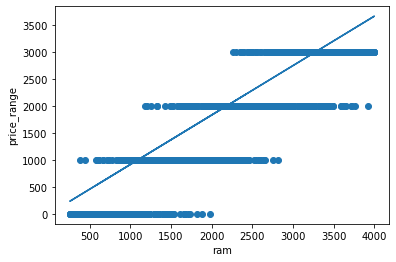

In [30]:
plt.plot(X_train["ram"], linear_regression.coef_[13] * X_train["ram"] + linear_regression.intercept_)
plt.scatter(X_train["ram"], y_train*1000)
plt.xlabel("ram")
plt.ylabel("price_range")

# 仮説の確認
最初に立てた仮説を確認してください．

予測傾向など精度ベースでも仮説を確認することはできますが，決定木や可視化を用いる方が楽かもしれません．

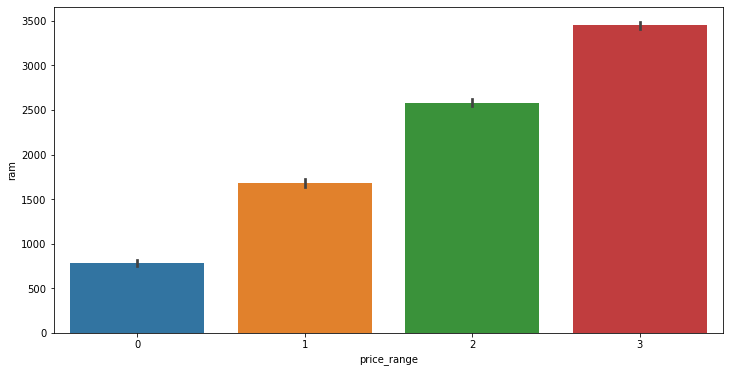

In [31]:
plt.figure(figsize=(12,6))
sns.barplot(x='price_range',y='ram',data=phone_df)
plt.show()

In [32]:
print("重回帰分析を行って、スマホの値段への影響度がramが一番大きいと出た。相関を見たところ、スマホの値段とramで相関がある図になった。")

重回帰分析を行って、スマホの値段への影響度がramが一番大きいと出た。相関を見たところ、スマホの値段とramで相関がある図になった。


<IPython.core.display.Javascript object>


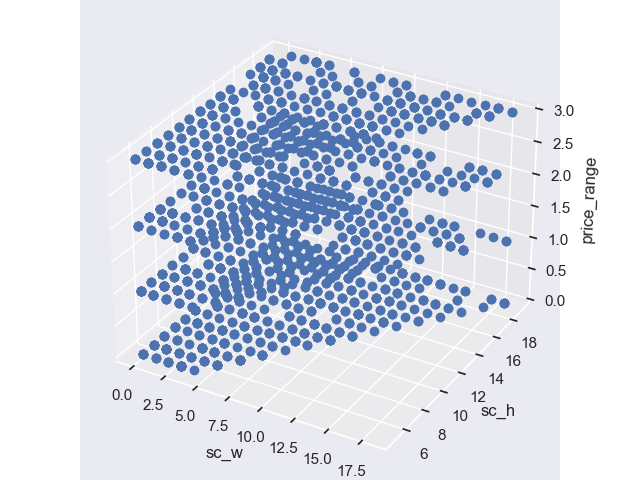

In [81]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 3D散布図でプロットするデータを生成する為にnumpyを使用
X = np.array(phone_df["sc_w"]) # 自然数の配列
Y = np.array(phone_df["sc_h"]) # 特に意味のない正弦
Z = np.array(phone_df["price_range"]) # 特に意味のない正弦

# グラフの枠を作成
fig = plt.figure()
ax = Axes3D(fig)

# X,Y,Z軸にラベルを設定
ax.set_xlabel("sc_w")
ax.set_ylabel("sc_h")
ax.set_zlabel("price_range")

# .plotで描画
ax.plot(X,Y,Z,marker="o",linestyle='None')

# 最後に.show()を書いてグラフ表示
plt.show()

<IPython.core.display.Javascript object>


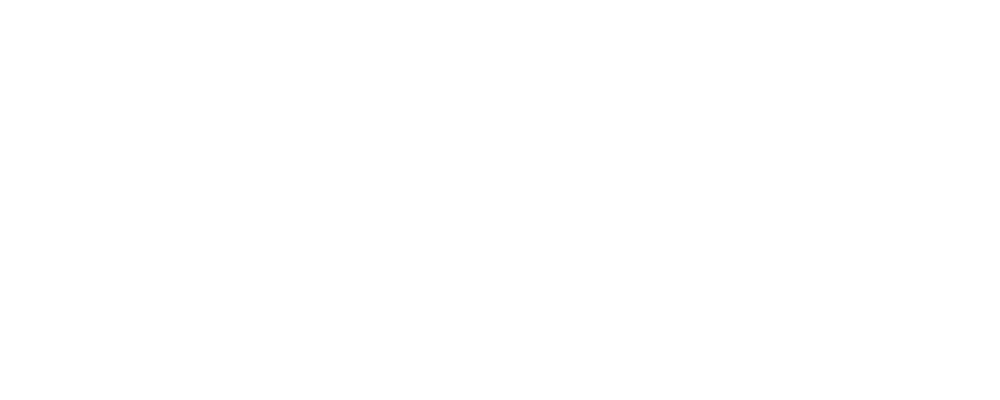

<IPython.core.display.Javascript object>


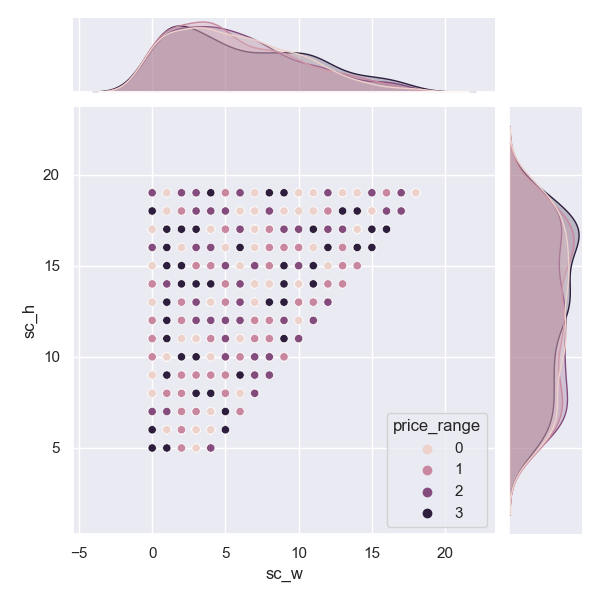

In [82]:
plt.figure(figsize=(10,4))
sns.set_style('whitegrid')
sns.set(font_scale=1)
g = sns.jointplot(data=phone_df, x="sc_w", y="sc_h", hue="price_range")
plt.show()


In [78]:
print("スクリーンの幅とスクリーンの高さ毎の値段の範囲を見たが、同じ大きさの携帯電話でもいろんな値段で売られていた。")

スクリーンの幅とスクリーンの高さ毎の値段の範囲を見たが、同じ大きさの携帯電話でもいろんな値段で売られていた。
